# KNN = K Nearest Neighbors

In [2]:
import pandas as pd

In [3]:
import numpy as np

In [4]:
from pandas import Series,DataFrame

In [5]:
df  =  pd.read_csv('Social_Network_Ads.csv')

In [6]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [7]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [8]:
x = df[['Age','EstimatedSalary']].values     # independent values

In [9]:
y = df['Purchased'].values    # Dependent values

In [10]:
from sklearn.model_selection import train_test_split    # Splits data into Training and Testing

In [11]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = 0.25,random_state = 42)

In [12]:
xtrain = xtrain.astype(float)     # Converting big values into float value
xtest = xtest.astype(float)

In [13]:
from sklearn.preprocessing import StandardScaler    # Compressing data between 0 and 1

In [14]:
sc = StandardScaler()

In [15]:
xtrain = sc.fit_transform(xtrain)   # Compressing data between 0 and 1

In [16]:
xtest = sc.transform(xtest)     # Compressing data between 0 and 1

In [17]:
from sklearn.neighbors import KNeighborsClassifier

In [18]:
classifier = KNeighborsClassifier(n_neighbors = 5)    # n_neighbors =  Check number of values to give a prediction

In [19]:
classifier.fit(xtrain,ytrain)     # Traing of Data

KNeighborsClassifier()

In [20]:
ypred = classifier.predict(xtest)

In [21]:
ypred

array([1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1], dtype=int64)

In [22]:
from sklearn.metrics import confusion_matrix

In [23]:
cm =confusion_matrix(ypred,ytest)    # Find number Correct and Wrong Values

In [24]:
cm

array([[59,  3],
       [ 4, 34]], dtype=int64)

In [25]:
import seaborn as sns

<AxesSubplot:>

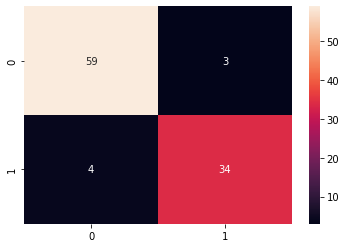

In [26]:
sns.heatmap(cm,annot = True)

In [27]:
from sklearn.metrics import accuracy_score

In [28]:
acc = accuracy_score(ypred,ytest)    # Check Accuracy of of prediction

In [29]:
acc      

0.93

In [31]:
# To find the best value of n_neghbors using for loop

from sklearn import metrics
k_range = range(1,40)
score = []
# num = []
for k in (k_range):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(xtrain,ytrain)
    y_pred = knn.predict(xtest)
    score.append(metrics.accuracy_score(y_pred,ytest))
print(np.array(score).max())


0.94


In [32]:
import matplotlib.pyplot as plt

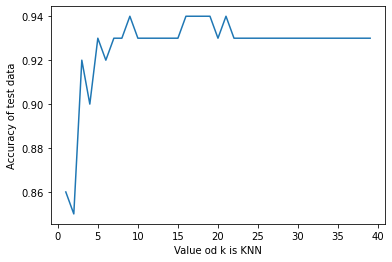

In [33]:
# To check the value of n_neighbors which has given highest accuracy
plt.plot(k_range,score)
plt.xlabel('Value od k is KNN')
plt.ylabel('Accuracy of test data')
plt.show()